In [1]:
import numpy as np
from pulse_designer import *

## Specify Suppression Frequencies (MHz)
- These frequencies are relative to the pulse’s center frequency (not the LO frequency).
- You may provide as many suppression frequencies as needed.

In [2]:
f_1 = -180.0
f_2 = -450.0

## Define Filter Lengths (samples)
- Each length must be an integer count of samples.
- Define one length value for each suppression frequency.
- Longer filter lengths yield narrower spectral width (in frequency domain) and smoother edges (in the time domain).

In [3]:
N_1 = 9
N_2 = 9

## Generate the Filters
- Each target frequency (in MHz) is converted to an angular frequency (rad/sample) using the sampling rate.
- The filters are then designed to suppress those angular frequencies.

In [4]:
sampl_rate_Hz = 1e9
w_1 = gen_w_pulse(N_1, f_1 * (2.0 * np.pi) * (1e6 / sampl_rate_Hz))
w_2 = gen_w_pulse(N_2, f_2 * (2.0 * np.pi) * (1e6 / sampl_rate_Hz))

## Convolve Filters with a Square Wave
- A square wave of $N_3$ samples is convolved with two suppression filters.
- The final pulse length is $(N_1 + N_2 + N_3 - 2)$, where “2” accounts for the two convolution operations.
- Physically, the real part of the pulse corresponds to the $I$ component and the imaginary part to the $Q$ component, both centered on the pulse's center frequency.
- After all convolutions, the resulting pulse is optionally normalized so that its peak amplitude is 1.

In [5]:
# Create a square wave
N_3 = 33
w = np.ones(N_3)

# Convolve
w = np.convolve(w, w_1)
w = np.convolve(w, w_2)

# Normalize
w /= np.max(np.real(w))

## Visualize the Results
- Use `freq_res_Hz` to set the frequency‑domain resolution: smaller values give finer detail at the cost of slower plotting.
- Pass a list `freqs_MHz_vline` of frequencies (in MHz) to draw vertical guideline markers on the spectrum plot.

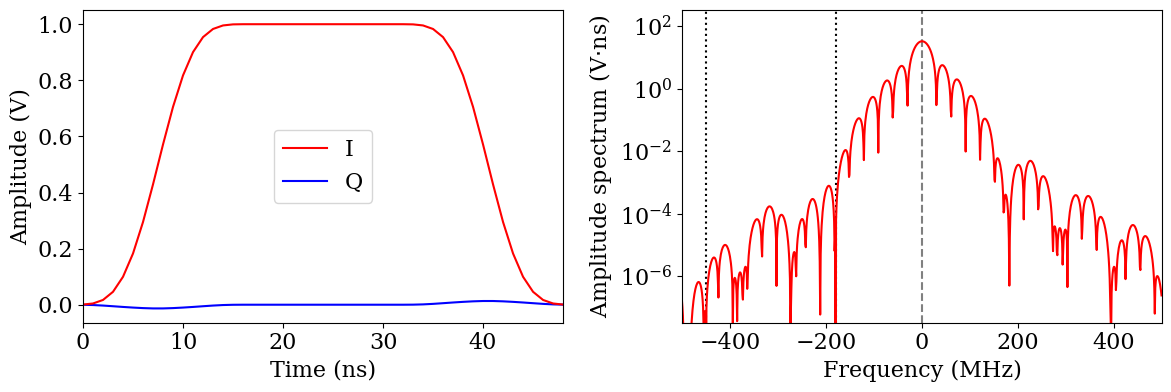

In [6]:
waveform_plot(w, sampl_rate_Hz=1e9, freqs_MHz_vline=[f_1, f_2], freq_res_Hz=1e6)

## Download the CSV file

In [7]:
export_w_pulse(w)

/home/backup_disk/xs427/projects/pulse-designer/outputs/w.csv